# Price - Quanitiy Relationship by Using Machine Learning and Streamlit



## About Dataset

**Q:** Quantitiy (Miktar)

**P:** Price (Fiyat)


**Model:** P=β0+β1*Q  

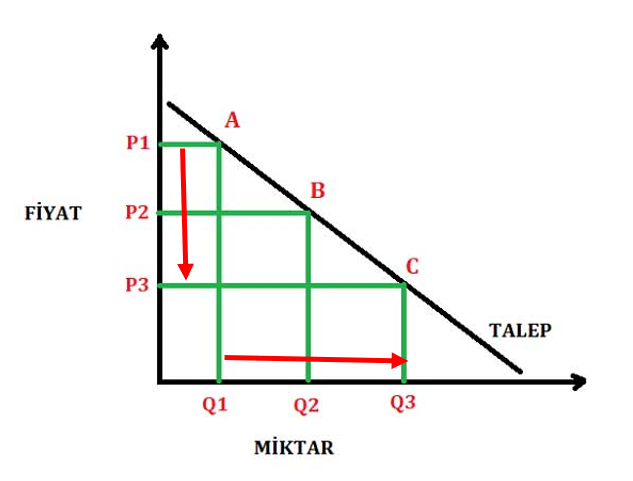

Bu modele gore fiyat arttiginda miktarin azlmasi beklenmektedir. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(10,6) # butun NB boyunca gorseller ayni boyutta olmasi icin

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore") # verilen uyarilan goz ardi edilmesi icin

## Read Data

In [12]:
df = pd.read_excel("Fiyat_Miktar_Iliskisi.xlsx")

#  EXPLORATORY DATA ANALYSIS (EDA)

In [13]:
df.head(5)

,Q,P
0,150,35.10
1,150,36.25
2,150,38.85
3,140,40.96
4,140,40.25


In [3]:
df.tail(5)

,Q,P
419,48,136.000000
420,15,136.000000
421,15,136.000000
422,15,136.000000
423,15,132.403963


In [21]:
df.sample(5)

,Q,P
290,43,112.25
204,54,85.36
255,40,96.25
8,138,58.20
391,25,130.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q       424 non-null    int64  
 1   P       424 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.8 KB


* 424 gozlem var, hic eksik (Null) data yok. 

## Null Value Check

In [23]:
# Veri setinde eksik deger olup olmadigini istersek bu sekilde kontrol edebiliriz;
df.isnull().sum()

Q    0
P    0
dtype: int64

* Veri setinde hic eksik (Null) data bulunmamaktadir. 

##  Shape

In [24]:
# Data Frame'nin sekline bakalim;
df.shape

(424, 2)

In [25]:
# df de 424 satir (gozlem, rows), 2 sutun (columns) var.

## Correlation

In [26]:
df.corr()

,Q,P
Q,1.000000,-0.635696
P,-0.635696,1.000000


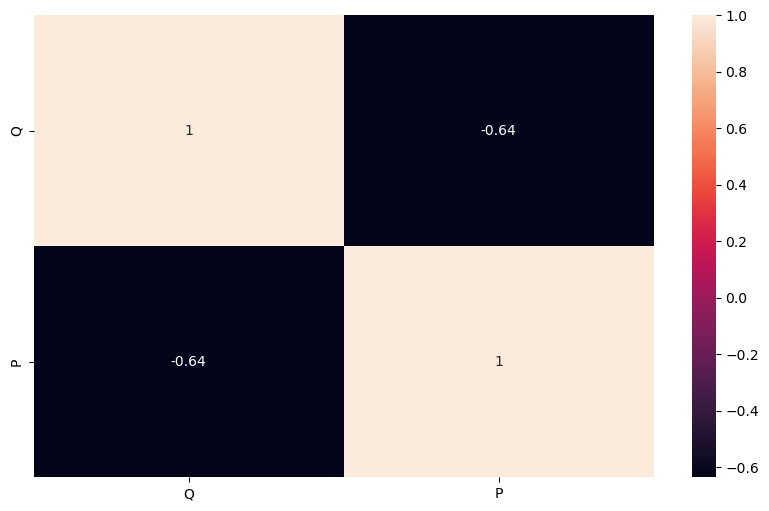

In [27]:
sns.heatmap(df.corr(), annot = True);

## Pairplot

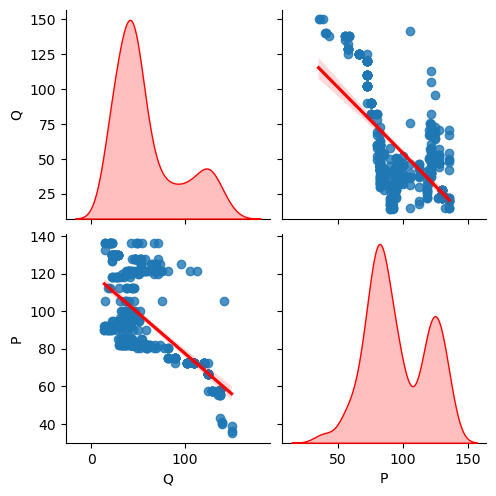

In [28]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

 ## Outliers Check
 
 Outlier kontrolunu 

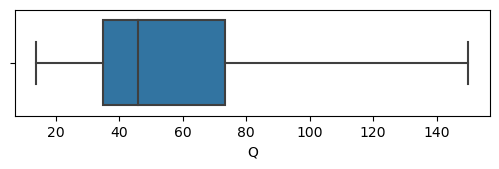

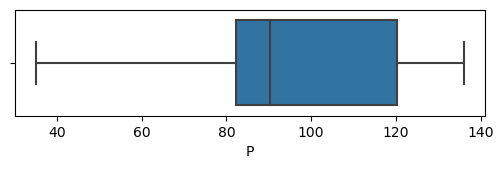

In [29]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(10,3))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df, whis=3) 
        
    plt.tight_layout()
    
    plt.show()

In [30]:
df.columns

Index(['Q', 'P'], dtype='object')

In [31]:
df.head(2)

,Q,P
0,150,35.10
1,150,36.25


## Labelling (Bagimsiz ve bagimli degiskenleri tanitalim)

In [14]:
X = df[["Q"]] # Burada tek surun olmasina ragmen yine de cift koseli parantez istiyor, yoksa scaling yaparkenb hata veriyor.
y = df["P"]

## Train | Test Split (Veri setini egitim ve test kisimlarina ayiralim.) 

In [15]:
# Split islemi icin gerekli olan kutuphaneyi cagiralim;

from sklearn.model_selection import train_test_split

In [6]:
# Split yapalim;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 1), (85, 1), (339,), (85,))

# SIMPLE LINEAR REGRESSION 

Dogrusal Regresyon Modelini **scale edilmemis** verilerle kurdum.

## Variables & Model

In [17]:
#Bir dogrusal model tahmini yapacagimiz icin "Linear Regression" kutuphanesini cagiralim (import edelim);

from sklearn.linear_model import LinearRegression

In [18]:
# LinarRegression fonksiyonunu bir degiskene (objeye) atiyoruz (assign ediyoruz). 

lin_reg = LinearRegression()  

In [20]:
# Modeli fit ediyoruz (katsayilari tahmin ediyoruz, modeli kuruyoruz).

lin_reg.fit(X_train, y_train) 

LinearRegression()

In [21]:
lin_reg.intercept_  #b0

120.0065484165273

In [22]:
lin_reg.coef_  # b1

array([-0.42756397])

* Buldugumuz katsayilari modelde yerine yazalim;

**P = 120 - 0.42*Q**

### Elde Ettigimiz Modeli "Train" Verilerine Uygulayalim

In [23]:
y_train_pred = lin_reg.predict(X_train)
y_train_pred

array([102.04886156,  66.56105181,  81.52579086, 101.62129758,
        75.11233127,  92.21489018,  97.34565786, 103.75911745,
        96.91809388, 108.46232115,  60.14759222,  68.69887168,
        97.34565786, 110.60014101, 100.76616964, 106.32450129,
        63.568104  , 109.3174491 , 101.62129758,  97.34565786,
        60.14759222,  64.85079592, 102.04886156,  72.9745114 ,
       101.62129758,  93.07001813,  72.9745114 , 100.76616964,
       100.76616964, 110.60014101, 102.04886156,  96.06296594,
        97.34565786, 109.3174491 ,  66.56105181,  61.00272016,
       105.04180937, 110.60014101,  94.35271005,  97.77322183,
       104.18668142,  66.56105181,  99.91104169, 110.60014101,
       100.76616964, 100.76616964, 107.6071932 , 113.59308882,
        93.07001813,  90.93219826, 108.03475718, 104.18668142,
       104.61424539,  96.06296594, 101.19373361,  94.35271005,
        98.2007858 , 101.62129758, 100.33860567,  99.05591375,
        81.52579086, 105.04180937,  98.2007858 ,  76.39

###  eval_metrics for "Train Data"

In [24]:
# Eval metrics icin kullanacagimiz kutuphaneyi cagiralim;

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Train Datasi icin eval metricsleri elde edelim; 

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    #print("Model testing performance:")
    print("---------------------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
print("Model testing performance for TRAIN DATA:")   



eval_metric(y_train, y_train_pred)

Model testing performance for TRAIN DATA:
---------------------------------------
R2_score 	: 0.391254508114694
MAE 		: 15.442200532270732
MSE 		: 327.9567007859933
RMSE 		: 18.109574837250964


### Elde Ettigimiz Modeli "Test" Verilerine Uygulayalim


* Elde ettigimiz modeli "Test" datalarini kullanarak sinayalim. 

* Bunun icin X_test verilerini elde ettigimiz modeldeki X yerine yazalim;

In [26]:
y_pred = lin_reg.predict(X_test)
y_pred

array([100.76616964, 104.18668142, 105.89693731, 102.04886156,
       113.59308882,  76.39502319, 102.04886156,  99.48347772,
        66.56105181,  76.39502319,  76.39502319,  84.94630264,
        91.35976224,  84.94630264, 108.03475718,  96.91809388,
        61.00272016,  98.2007858 , 105.04180937, 107.17962923,
       102.47642553, 108.03475718,  95.63540196, 107.6071932 ,
        72.9745114 ,  99.91104169,  72.9745114 , 105.04180937,
       100.76616964,  81.52579086,  90.50463429, 100.76616964,
       103.33155348,  97.34565786,  90.50463429,  98.62834977,
       112.73796088,  66.56105181, 102.04886156, 102.04886156,
        76.39502319,  81.52579086,  99.48347772,  66.56105181,
       100.76616964, 110.60014101,  96.91809388,  59.29246427,
        99.48347772,  62.28541208,  81.52579086,  99.05591375,
        55.87195249,  64.85079592, 105.89693731,  92.64245415,
       100.33860567, 104.61424539,  81.52579086,  81.52579086,
       101.19373361,  94.35271005,  66.56105181, 108.03

### eval_metrics for "Test Data"

In [28]:
# Test Datasi icin eval metricsleri elde edelim; 

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    #print("Model testing performance:")
    print("----------------------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
    
print("Model testing performance for TEST DATA:")   


eval_metric(y_test, y_pred)

Model testing performance for TEST DATA:
----------------------------------------
R2_score 	: 0.4425974562012972
MAE 		: 14.658147543522546
MSE 		: 343.7446526808931
RMSE 		: 18.540352010706084


### Train ve Test datalari icin yaptigimiz tahmin sonuclarini "eval_metrics" uzerinden karsilastirmali degerlendirelim; 

In [50]:
print("Linear Model testing performance for TRAIN DATA:")
print(eval_metric(y_train, y_train_pred))

print("---------------------------------------")

print("Linear Model testing performance for TEST DATA:")
print(eval_metric(y_test, y_pred))

Linear Model testing performance for TRAIN DATA:
----------------------------------------
R2_score 	: 0.3912545081146941
MAE 		: 15.442200532270732
MSE 		: 327.95670078599323
RMSE 		: 18.109574837250964
None
---------------------------------------
Linear Model testing performance for TEST DATA:
----------------------------------------
R2_score 	: 0.4425974562012974
MAE 		: 14.658147543522546
MSE 		: 343.74465268089307
RMSE 		: 18.540352010706084
None


### Simple Linear 'a ait eval metrikler icin 2. Yol: 

In [56]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [58]:
Simple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "Simple_Linear")
Simple_linear

,Simple_Linear_train,Simple_Linear_test
R2,0.391255,0.442597
mae,15.442201,14.658148
mse,327.956701,343.744653
rmse,18.109575,18.540352


**DEGERLENDIRME:** Train ve test datalarina ait R2 sonuclari birbirine cok yakin, overfitting sorunu yoktur. Ama skorlar dusuk. 

## Cross Validate (Çapraz doğrulama) 

Elde ettigimiz R2, MAE, MSE, RMSE değerlerim gerçekten CV sonrası aldığım değerle uyumlu mu?)

In [30]:
# Cross-Validation islemi icin gerekli kutuphaneleri import edelim;

from sklearn.model_selection import cross_validate, cross_val_score

In [31]:
# CV yapalim; 

model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10) # cv; cross validation demek

In [32]:
# CV'nin her asamasinda elde edilen metrikleri gorelim;

pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.015354,0.005803,0.488409,-16.088812,-373.528525,-19.326886
2,0.000702,0.000000,0.381652,-14.794872,-252.413850,-15.887538
3,0.008179,0.005820,0.307689,-18.129746,-414.143175,-20.350508
4,0.000000,0.016430,0.169071,-15.926451,-335.252811,-18.309910
5,0.008125,0.006058,0.353263,-14.896447,-308.607868,-17.567238
6,0.009397,0.000000,0.293316,-15.345292,-305.768981,-17.486251
7,0.008021,0.008750,0.270574,-15.754621,-377.457012,-19.428253
8,0.008019,0.000000,0.341509,-14.962293,-324.329153,-18.009141
9,0.009233,0.002814,0.489177,-14.791370,-334.043749,-18.276864
10,0.003420,0.005402,0.390900,-14.816515,-293.119999,-17.120748


In [33]:
# Bu metriklerin ortalamasini hesaplayalim; 

scores = pd.DataFrame(scores, index=range(1,11)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                               0.348556
test_neg_mean_absolute_error        -15.550642
test_neg_mean_squared_error        -331.866512
test_neg_root_mean_squared_error    -18.176334
dtype: float64

**YORUM:** CV sonrasi elde ettigimiz R2 de 0.34 oldu. Modelin basarisi dusuk.

# Final Model
Final modeli, scale edilmemis verilerle kurdum.

In [34]:
# Tum verileri kullanacagiz;  
X = df[["Q"]]
y = df["P"]

In [37]:
# Final Modeli full data ile tahmin edelim; 
final_linear = LinearRegression()
final_linear.fit(X, y)

LinearRegression()

In [38]:
# Final modeli kaydedelim 
import pickle
pickle.dump(final_linear, open("final_linear_model_B00FS3VJAO", 'wb'))

In [40]:
# Bu modelin basarisina bakalim; 
y_pred = final_linear.predict(X)
y_pred

array([ 56.12376715,  56.12376715,  56.12376715,  60.4165428 ,
        60.4165428 ,  60.4165428 ,  61.27509793,  61.27509793,
        61.27509793,  61.27509793,  61.27509793,  61.27509793,
        61.27509793,  61.27509793,  61.27509793,  62.56293062,
        63.85076331,  65.13859601,  65.13859601,  65.13859601,
        65.13859601,  65.13859601,  65.13859601,  65.13859601,
        65.13859601,  66.85570627,  66.85570627,  66.85570627,
        66.85570627,  66.85570627,  66.85570627,  66.85570627,
        66.85570627,  66.85570627,  66.85570627,  66.85570627,
        66.85570627,  66.85570627,  66.85570627,  66.85570627,
        66.85570627,  69.00209409,  69.00209409,  69.00209409,
        69.00209409,  69.00209409,  69.00209409,  69.00209409,
        69.00209409,  69.00209409,  69.00209409,  69.00209409,
        69.00209409,  73.29486973,  73.29486973,  73.29486973,
        73.29486973,  73.29486973,  73.29486973,  73.29486973,
        73.29486973,  73.29486973,  73.29486973,  73.29

In [41]:
eval_metric(y, y_pred)

----------------------------------------
R2_score 	: 0.40410989726993796
MAE 		: 15.374958936005546
MSE 		: 330.95140596018854
RMSE 		: 18.192069864646754


In [42]:
# Bu final modeli kullanarak katsayilari hesaplayip, denklemi kurabiliriz;

final_linear.intercept_

120.51540183503617

In [43]:
final_linear.coef_

array([-0.42927756])

Final Equation;
P = 120.51 -0.42Q

**YORUM:** Olusan denklem; P = 120.51 -0.42Q
Buradan Q yalniz birakilirsa; 
Q = 286.92 - 2.38*P

Bunun manasi; fiyat 1 $ arttiginda talep edilen ofis sandelyesi miktari ortalama 2.38 azalmaktadir.